# 数据可视化
数据可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idea等。另外，做一个可交互的数据可视化也许是工作的最终目标。<br>
包：
* matplotlib
* seaborn

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import tushare as ts

# 测试

In [9]:
xa=ts.get_k_data('000001','2018-04-01')
xa.head()

,date,open,close,high,low,volume,code
59,2018-04-02,10.697,10.540,10.815,10.530,1109316.0,000001
60,2018-04-03,10.432,10.392,10.500,10.343,890745.0,000001
61,2018-04-04,10.510,10.697,10.835,10.432,1602488.0,000001
62,2018-04-09,10.628,10.845,10.924,10.559,1074795.0,000001
63,2018-04-10,10.845,11.238,11.278,10.796,1390950.0,000001


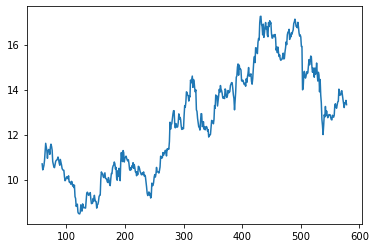

In [10]:
plt.plot(xa.open)

# Figure和Subplot

In [4]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

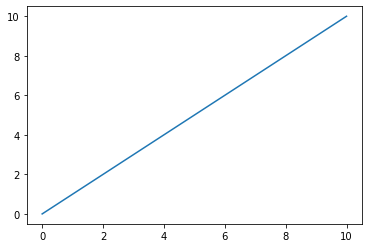

In [7]:
plt.plot(range(11))

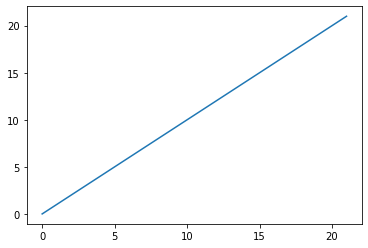

In [8]:
plt.plot(range(22))

In [9]:
ax1.plot(range(11))

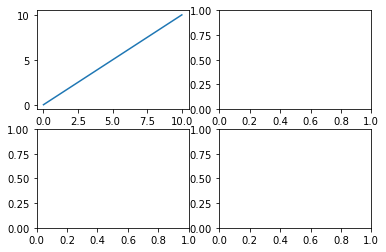

In [10]:
fig

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDAAD05608>,
      dtype=object)

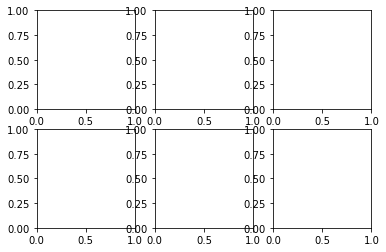

In [11]:
fig,axes=plt.subplots(2,3)
axes

plt.subplots的参数
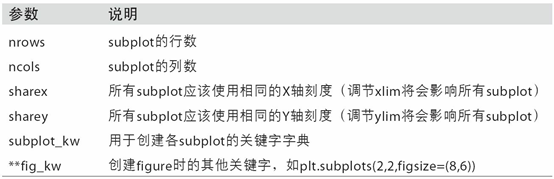

# 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。

In [12]:
import numpy as np

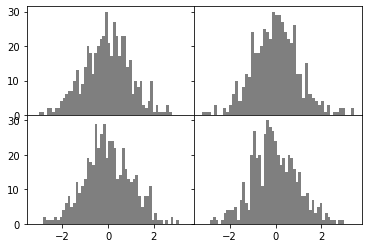

In [13]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

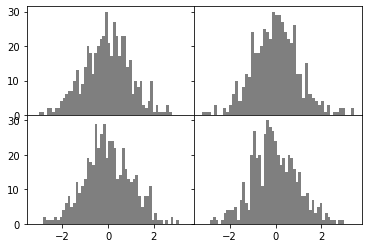

<Figure size 432x288 with 0 Axes>

In [14]:
plt.subplots_adjust(left=0,right=1,top=1,bottom=0)
fig

# 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。

In [15]:
xa.head()

,date,open,close,high,low,volume,code
59,2018-04-02,10.697,10.540,10.815,10.530,1109316.0,000001
60,2018-04-03,10.432,10.392,10.500,10.343,890745.0,000001
61,2018-04-04,10.510,10.697,10.835,10.432,1602488.0,000001
62,2018-04-09,10.628,10.845,10.924,10.559,1074795.0,000001
63,2018-04-10,10.845,11.238,11.278,10.796,1390950.0,000001


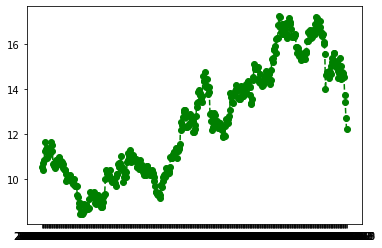

In [16]:
plt.figure()
plt.plot(xa.date,xa.close,'go--')

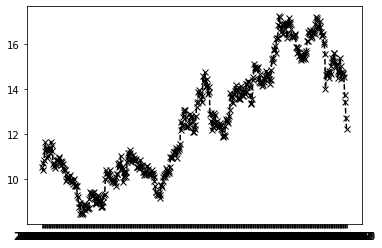

In [17]:
plt.plot(xa.date,xa.close,color='#000000',linestyle='--',marker='x')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改

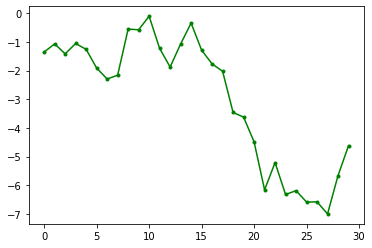

In [18]:
plt.figure()
data=np.random.randn(30).cumsum()
plt.plot(data,color='green',marker='.',label='default')

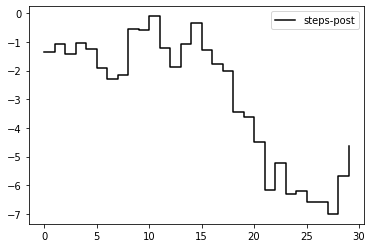

In [19]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

# 刻度、标签和图例

In [20]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [21]:
ax=fig.add_subplot(1,1,1)

In [22]:
ax.plot(np.random.randn(200).cumsum())

要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签

In [23]:
ticks=ax.set_xticks(range(0,200,30))

In [24]:
labels=ax.set_xticklabels(list('abcdefg'),rotation=30,fontsize=8)

In [25]:
ax.set_xlabel('date')

Text(0.5, 0, 'date')

In [26]:
ax.set_title('first picture')

Text(0.5, 1.0, 'first picture')

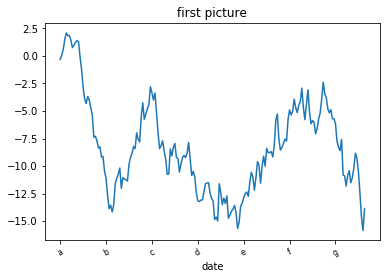

In [27]:
fig

# 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

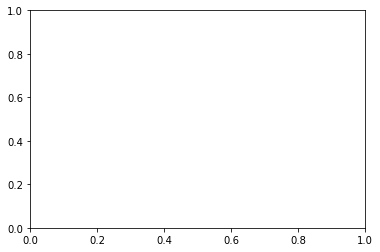

In [28]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

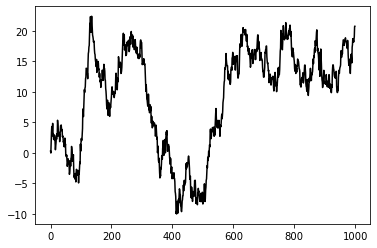

In [29]:
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
fig

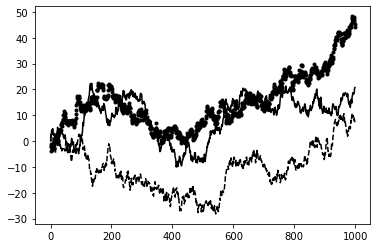

In [30]:
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
fig

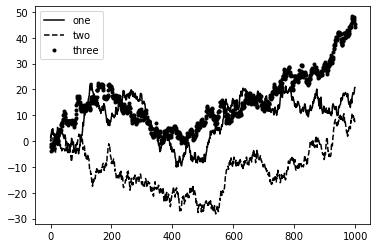

In [31]:
ax.legend()
fig

# 注解以及在Subplot上绘图
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式

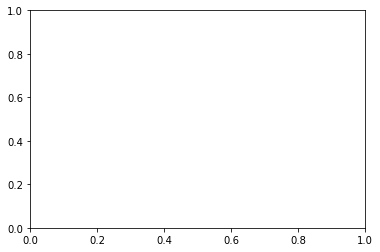

In [32]:
ax=plt.figure().add_subplot(1,1,1)

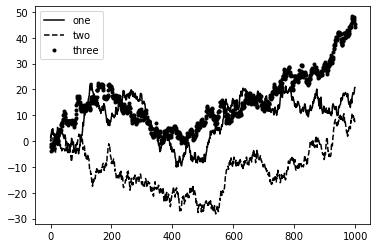

In [33]:
ax.plot(xa.close,'k-')
fig

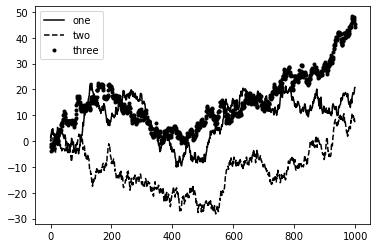

In [34]:
cc=[(20,'i am here'),(60,'this is 60'),(120,'the end')]
for pos,label in cc:
    ax.annotate(label,xy=(pos,xa.close.iloc[pos]))
fig

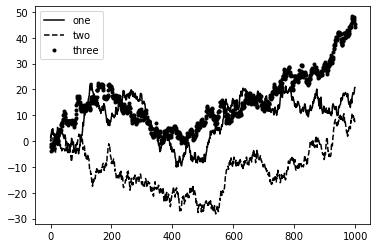

In [35]:
ax.set_title('picture')
fig

# 绘制形状
图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。

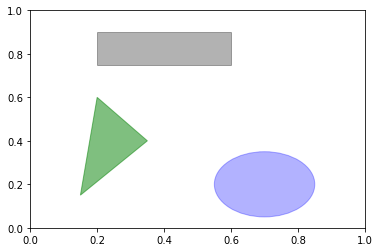

In [36]:
ax=plt.figure().add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)